# Histogram Equilization

## Theory

Histogram Equilization is used in **image processing** to convert images in with low contrast into images with higher contrast. Its task is contrast enhancement. Any image can be represented as a matrix of pixels where each pixel holds a value for the colour it is. Take the example below:

<div style="display: flex; flex-wrap: wrap; justify-content: center;">
    <figure style="margin: 10px;">
        <img src="./Images/input_image.png" alt="Initial Picture" style="width: 200px; height: 100px; object-fit: cover;">
        <figcaption>Initial Picture</figcaption>
    </figure>
     <figure style="margin: 10px;">
        <img src="./Images/HE/output_image.jpg" alt="Final Picture" style="width: 200px; height: 100px; object-fit: cover;">
        <figcaption>Final Picture</figcaption>
    </figure>
</div>

Histogram equilization works mainly on greyscale pictures - which is a 2D representation of images. Depending on the size of the image (n-bit), the greyscale is assigned. For example, a 3-bit image can store shades of grey that start from 0 (black) to 7 (white). Therefore, it can store 8 shades of grey. Similarly, an 8-bit greyscale image can store 256 shades (0: black, 255:white). Taken below is the example of a 3-bit greyscale image along with its 2D representation and its histogram equivalent.

<div style="display: flex; flex-wrap: wrap; justify-content: center;">
    <figure style="margin: 10px;">
        <img src="./Images/HE/hegs1.png" alt="3-bit Image" style="width: 200px; height: 200px; object-fit: cover;">
        <figcaption>3-bit Image</figcaption>
    </figure>
    <figure style="margin: 10px;">
        <img src="./Images/HE/hegs2.png" alt="2D Matrix Representation" style="width: 280px; height: 200px; object-fit: cover;">
        <figcaption>2D Matrix Representation</figcaption>
    </figure>
    <figure style="margin: 10px;">
        <img src="./Images/HE/hegs3.png" alt="Corresponding Histogram" style="width: 300px; height: 200px; object-fit: cover;">
        <figcaption>Corresponding Histogram</figcaption>
    </figure>
</div>

Objective is to get $s = T(r)$ transformation that produces a level $s$ for every pixel level $r$ in the original image to get uniform histogram.

Constraint on $T(r)$:   
$T(r)$ should satisfies the following conditions:
1. $T(r)$ is monotonically increasing where $r$ is in the range $[0,1]$  
    - This condition ensures that output intensity values will never be less than corresponding input values, thus preventing artifactscreated by reversals of intensity  
2. $T(r)$ also varies in the range $[0,1]$  
    - This condition ensures that resulting gray levels are in the same range as input levels

Usually the cumulative distibutive function is chosen as the transformation function

### Notations: 

  
In a gray level image, let us consider:    
>$L$  -No. of gray levels in the image $(0 $  to  $ L-1)$  
>$r_k$-The normalized intensity value (gray level), $r_k∈[0,1]$, here $k ∈[0,L-1]$  
>$n_k$-No. of pixels with gray level $r_k$   
>$N$-Total number of pixels in the image  

Histogram (h) of an image is defined as
$$h(r_k)=n_k  \hspace{30 mm}k=0,1,2,..L-1$$


The probabilities assigned to each gray level can be given by the relation:
$$𝒑_𝒓(𝒓_𝒌)=\frac{𝒏_𝒌}{𝑵}\hspace{10 mm}𝟎≤𝒓_𝒌≤𝟏\hspace{10 mm}𝒌=𝟎,𝟏,𝟐…𝑳−𝟏$$


The plot of $p_r(r_k)$ with respect to $r_k$ is called normalized histogram of the image

### Types of Images

There are 4 different types of images:
1. Dark image
2. Light Image
3. Low Contrast Image
4. High Contrast Image

Here we see the comparison between each image and its corresponding histogram

<div style="display: flex; flex-wrap: wrap; justify-content: center;">
    <figure style="margin: 10px;">
        <img src="./Images/HE/dark.jpg" alt="Dark Image" style="width: 400px; height: 280px; object-fit: cover;">
        <figcaption>Dark Image</figcaption>
    </figure>
     <figure style="margin: 10px;">
        <img src="./Images/HE/darkhist.png" alt="Dark Image Histogram" style="width: 400px; height: 280px; object-fit: cover;">
        <figcaption>Dark Image Histogram</figcaption>
    </figure>
</div>

<div style="display: flex; flex-wrap: wrap; justify-content: center;">
    <figure style="margin: 10px;">
        <img src="./Images/HE/light.jpg" alt="Light Image" style="width: 400px; height: 280px; object-fit: cover;">
        <figcaption>Light Image</figcaption>
    </figure>
     <figure style="margin: 10px;">
        <img src="./Images/HE/lighthist.png" alt="Light Image Histogram" style="width: 400px; height: 280px; object-fit: cover;">
        <figcaption>Light Image Histogram</figcaption>
    </figure>
</div>

<div style="display: flex; flex-wrap: wrap; justify-content: center;">
    <figure style="margin: 10px;">
        <img src="./Images/HE/lc.png" alt="Low Contrast Image" style="width: 400px; height: 280px; object-fit: cover;">
        <figcaption>Low Contrast Image</figcaption>
    </figure>
     <figure style="margin: 10px;">
        <img src="./Images/HE/lchist.png" alt="Low Contrast Image Histogram" style="width: 400px; height: 280px; object-fit: cover;">
        <figcaption>Low Contrast Image Histogram</figcaption>
    </figure>
</div>

<div style="display: flex; flex-wrap: wrap; justify-content: center;">
    <figure style="margin: 10px;">
        <img src="./Images/HE/hc.png" alt="High Contrast Image" style="width: 400px; height: 280px; object-fit: cover;">
        <figcaption>High Contrast Image</figcaption>
    </figure>
     <figure style="margin: 10px;">
        <img src="./Images/HE/hchist.png" alt="High Contrast Image Histogram" style="width: 400px; height: 280px; object-fit: cover;">
        <figcaption>High Contrast Image Histogram</figcaption>
    </figure>
</div>

## Code - Without OpenCV

### Step 1: Import the libraries

In [5]:
import numpy as np 
from PIL import Image
import matplotlib.pyplot as plt

### Step 2: Import the image

In [3]:
image = Image.open('./Images/HE/input_image.png')

If the image is not in greyscale, convert using the following code:
```
gray_image = image.convert('L')
```

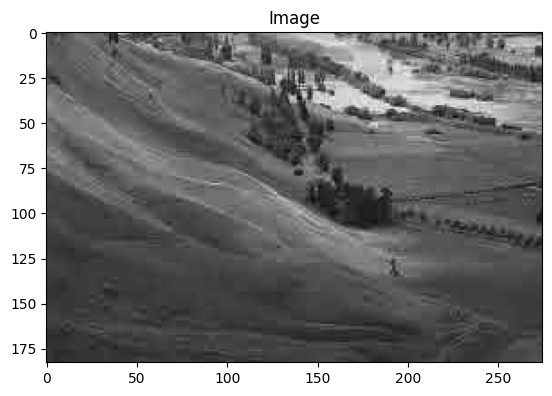

In [21]:
image = image.convert('L')
plt.imshow(image, cmap='gray')
plt.title('Image')
plt.show()

#### Convert to numpy array

In [23]:
img_array = np.asarray(image)

(183, 275)

### Step 3: Plot the histogram

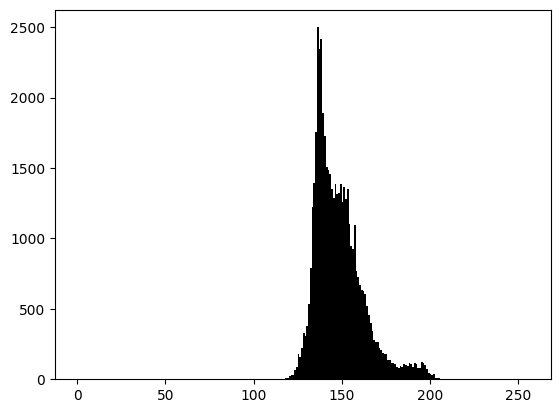

In [24]:
#flatten image array and calculate histogram via binning
plt.hist(img_array.flatten(), bins=256, range=[0, 256], color='black')
histogram_array = np.bincount(img_array.flatten(), minlength=256)

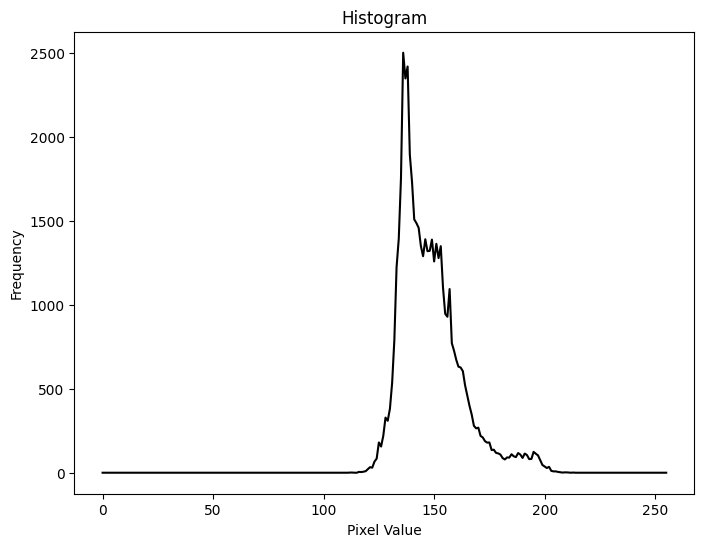

In [25]:
# Plot the histogram
plt.figure(figsize=(8, 6))
plt.plot(histogram_array, color='black')
plt.title('Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.show()

As we can see the image is a low contrast image. We can perform histogram equilization to make it a high contrast image

### Step 5: Normalizing and finding the CDF

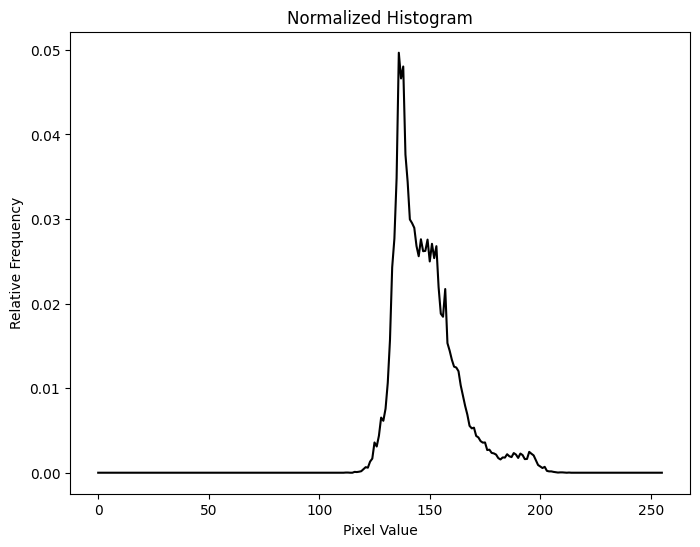

In [26]:
num_pixels = np.sum(histogram_array)
histogram_array = histogram_array/num_pixels

# Plot the histogram
plt.figure(figsize=(8, 6))
plt.plot(histogram_array, color='black')
plt.title('Normalized Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Relative Frequency')
plt.show()

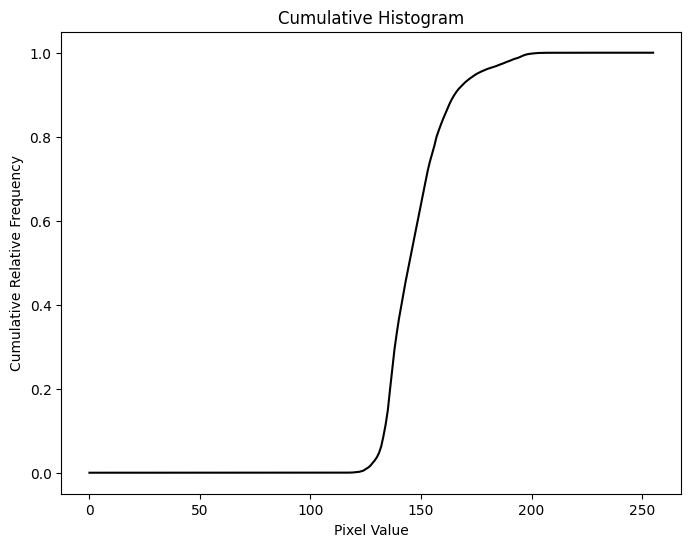

In [27]:
#normalized cumulative histogram
chistogram_array = np.cumsum(histogram_array)
# Plot the histogram
plt.figure(figsize=(8, 6))
plt.plot(chistogram_array, color='black')
plt.title('Cumulative Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Cumulative Relative Frequency')
plt.show()

### Step 6: Creating the Pixel Mapping Lookup Table

In [28]:
transform_map = np.floor(255 * chistogram_array).astype(np.uint8)

### Step 6: Transformation

In [30]:
# flatten image array into 1D list
img_list = list(img_array.flatten())

# transform pixel values to equalize
eq_img_list = [transform_map[p] for p in img_list]

# reshape and write back into img_array
eq_img_array = np.reshape(np.asarray(eq_img_list), img_array.shape)


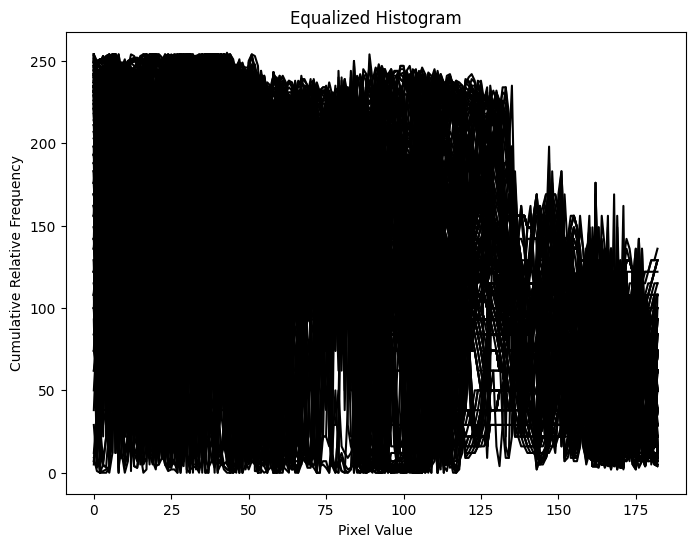

In [31]:
# Plot the histogram
plt.figure(figsize=(8, 6))
plt.plot(eq_img_array, color='black')
plt.title('Equalized Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Cumulative Relative Frequency')
plt.show()


### Step 7: Obtain the final Image

In [32]:
#convert NumPy array to pillow Image and write to file
eq_img = Image.fromarray(eq_img_array, mode='L')

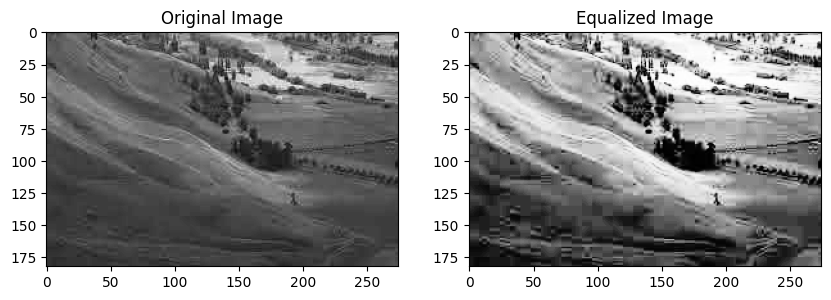

In [33]:
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(eq_img, cmap='gray')
plt.title('Equalized Image')
plt.show()

## Code- With OpenCV

In [7]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt


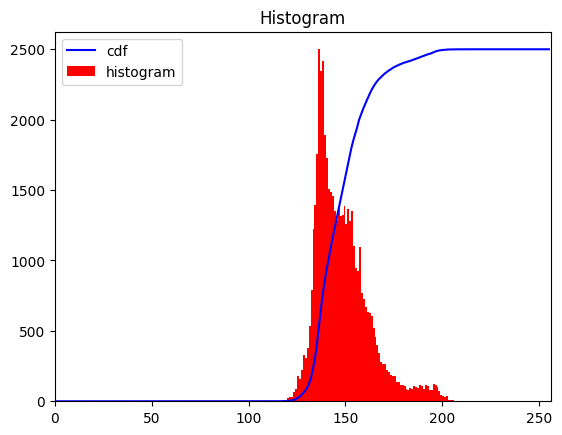

In [8]:
img = cv.imread('Images/input_image.png', cv.IMREAD_GRAYSCALE)

assert img is not None, "file could not be read, check with os.path.exists()"
hist,bins = np.histogram(img.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])

plt.title('Histogram')
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()


In [9]:
cdf_m = np.ma.masked_equal(cdf,0)
cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
cdf = np.ma.filled(cdf_m,0).astype('uint8')

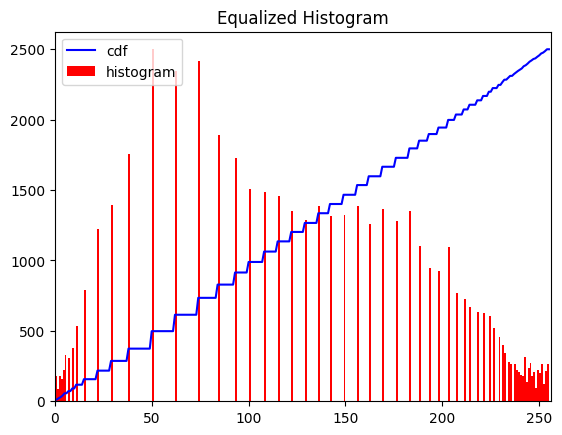

In [10]:
img2 = cdf[img]
hist2,bins2 = np.histogram(img2.flatten(),256,[0,256])
cdf2 = hist2.cumsum()
cdf_normalized2= cdf2 * float(hist2.max()) / cdf2.max()
plt.plot(cdf_normalized2, color = 'b')
plt.hist(img2.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.title('Equalized Histogram')
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

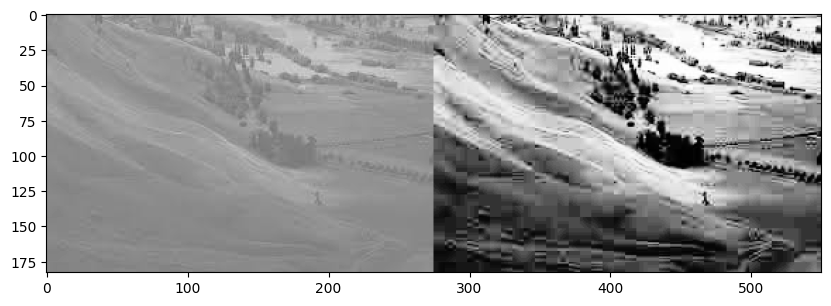

In [11]:
equ = cv.equalizeHist(img)
res = np.hstack((img,equ)) #stacking images side-by-side
plt.figure(figsize=(10, 6))

plt.imshow(res, cmap='gray')
plt.show()